# Introduction to neural network classification with TensorFlow

This notebook will be about neural network classification problems.

A classification problem is the act of defining something as what it is.

Types:
* Binary Classifciation
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [18]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                   noise=0.03,
                   random_state=42)

In [19]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [20]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Data is difficult to understand, visualize

In [21]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


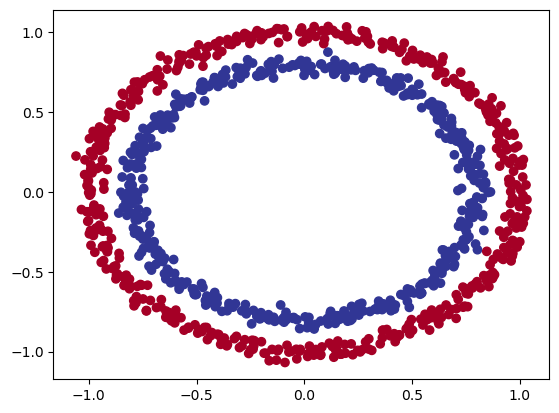

In [22]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input an output shapes of our neural network

In [23]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [24]:
# How many samples
len(X), len(y)

(1000, 1000)

In [25]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate again...

In [26]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.10.0'

In [27]:
# confirm GPU access for TensorFlow
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [28]:
y.dtype

dtype('int64')

In [29]:
# set the seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. fit the model
model_1.fit(tf.constant(X), tf.constant(y), epochs=5)

Epoch 1/5
14/32 [============>.................] - ETA: 0s - loss: 5.7225 - accuracy: 0.5134

2023-01-02 19:15:18.558217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:15:18.596569: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:15:18.596616: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


32/32 [==============================] - 0s 8ms/step - loss: 5.9696 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 7ms/step - loss: 6.6990 - accuracy: 0.4710
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 7.1121 - accuracy: 0.5030
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 6.5878 - accuracy: 0.5270
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 6.3018 - accuracy: 0.5400


In [30]:
# Improve model, train it longer
model_1.fit(X, y, epochs=200)

Epoch 1/200
19/32 [================>.............] - ETA: 0s - loss: 5.6928 - accuracy: 0.5872

2023-01-02 19:15:19.749438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:15:19.788442: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:15:19.788488: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


32/32 [==============================] - 0s 6ms/step - loss: 5.8249 - accuracy: 0.5800
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7613 - accuracy: 0.5740
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 5.7616 - accuracy: 0.5700
Epoch 4/200
32/32 [==============================] - 0s 6ms/step - loss: 5.7609 - accuracy: 0.5690
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 5.7606 - accuracy: 0.5720
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 5.7605 - accuracy: 0.5710
Epoch 7/200
32/32 [==============================] - 0s 7ms/step - loss: 5.7607 - accuracy: 0.5700
Epoch 8/200
32/32 [==============================] - 0s 6ms/step - loss: 5.7605 - accuracy: 0.5690
Epoch 9/200
32/32 [==============================] - 0s 6ms/step - loss: 5.7604 - accuracy: 0.5700
Epoch 10/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7606 - accuracy: 0.5700
Epoch 11/200
32/32 [=

32/32 [==============================] - 0s 5ms/step - loss: 5.7588 - accuracy: 0.5730
Epoch 84/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7585 - accuracy: 0.5700
Epoch 85/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7585 - accuracy: 0.5700
Epoch 86/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7587 - accuracy: 0.5730
Epoch 87/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7584 - accuracy: 0.5730
Epoch 88/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7587 - accuracy: 0.5710
Epoch 89/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7584 - accuracy: 0.5710
Epoch 90/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7584 - accuracy: 0.5710
Epoch 91/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7585 - accuracy: 0.5710
Epoch 92/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7582 - accuracy: 0.5720
Epoch 93/200


32/32 [==============================] - 0s 5ms/step - loss: 5.7568 - accuracy: 0.5710
Epoch 165/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7569 - accuracy: 0.5700
Epoch 166/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7570 - accuracy: 0.5720
Epoch 167/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7570 - accuracy: 0.5730
Epoch 168/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7573 - accuracy: 0.5720
Epoch 169/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7567 - accuracy: 0.5750
Epoch 170/200
32/32 [==============================] - 0s 6ms/step - loss: 5.7570 - accuracy: 0.5720
Epoch 171/200
32/32 [==============================] - 0s 5ms/step - loss: 5.7568 - accuracy: 0.5720
Epoch 172/200
32/32 [==============================] - 0s 6ms/step - loss: 5.7566 - accuracy: 0.5700
Epoch 173/200
32/32 [==============================] - 0s 6ms/step - loss: 5.7572 - accuracy: 0.5730
Epoc

In [33]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 7ms/step - loss: 5.6825 - accuracy: 0.5590


[5.682535171508789, 0.5590000152587891]

Binary classification means one or the other, with the model getting 50% accuracy that is only as good as a random guess.

Let's try adding another layer

In [34]:
# set the seed
tf.random.set_seed(42)

with tf.device("/CPU:0"):
    # 1. Create the model
    model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ])

    # 2. compile the model
    model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.SGD(),
                   metrics=["accuracy"])

    # fit the model
    model_2.fit(X, y, epochs=100, verbose=0)

In [35]:
# 4. Evaluate the model again
model_2.evaluate(X, y)

22/32 [===================>..........] - ETA: 0s - loss: 0.6929 - accuracy: 0.5099

2023-01-02 19:16:10.912659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:16:10.934653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:10.934696: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


32/32 [==============================] - 0s 8ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932562589645386, 0.5]

## Improving our model

1. Create a model - Add layers or neurons, change activation function
2. Compile a model - Choose a different optimization function
3. Fit a model - More epochs

### CPU VS GPU
**EXPERIMENT**

I ran a little experiment to test CPU vs GPU. If you run `with tf.device('/CPU:0')` or `with tf.device('/GPU:0')` it forces TensorFlow to use the device you requested.

GPUs are much faster for computationally difficult tasks and very large models. However, the overhead burden of transferring information between the GPU and the rest of the system can cause speed deficits for smaller experiements. As you can see below, I used the `/CPU:0` to run the model training. There was an approximate 10x increase in speed using the CPU.

**GPU IS NOT ALWAYS FASTER**

In [36]:
with tf.device("/CPU:0"):    
    # set seed
    tf.random.set_seed(42)

    # 1. build the model
    model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(100, input_shape=(None, 1)),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ])

    # 2. compile the model
    model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

    # 3. fit the model
    model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.2255 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7486 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4914
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5016
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4869
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4881
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4844
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4981
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4997
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5062
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4827
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4860
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4882
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.5052
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.4775
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5215
Epoch 93/100


In [37]:
# 4. Evaluate the model
model_3.evaluate(X, y)

2023-01-02 19:16:15.643869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:16:15.677388: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:15.677441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-02 19:16:15.678986: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:15.679039: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

32/32 [==============================] - 1s 12ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939404010772705, 0.5]

To visualize the model's predictions, let's write a function

* Take in a trained mode, features (X), and labels (y)
* Create a NumPy meshgrid of the various X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between the zones

In [38]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    Function inspired by:
      1. Made with ML: https://github.com/GokuMohandas/Made-With-ML
      2. CS231n Deep Learning for Computer Vision: http://cs231n.stanford.edu/
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 # gets the min and max of the first column and adds margin
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 # gets the min and max of the second column and adds margin
    
    # create the meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max), # creates the meshgrid using evenly spaces values between the previously created min and max
                        np.linspace(y_min, y_max))
    
    # Create X value (we're going to make predictions)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together, column order unraveling of 2D arrays
    
    # make predictions
    y_pred = model.predict(x_in)
    
    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multi")
        # we have to reshape our predictions
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

25/79 [========>.....................] - ETA: 0s

2023-01-02 19:16:16.823586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:16:16.843289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:16.843329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-02 19:16:16.844526: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:16.844559: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

79/79 [==============================] - 1s 7ms/step


2023-01-02 19:16:17.366491: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:17.366538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-02 19:16:17.390360: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:17.390406: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: 

Doing multi


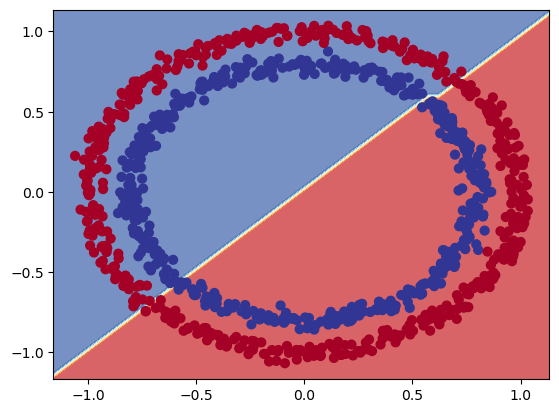

In [39]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [40]:
# try to make model work for regression due to linearity

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# split regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


2023-01-02 19:16:18.284787: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:18.284837: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-02 19:16:18.287735: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:18.287777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: 

5/5 [==============================] - 2s 62ms/step - loss: -5513.4404 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 31ms/step - loss: -7146.0879 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: -7156.4463 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: -7190.0146 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: -7190.0146 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: -7190.0146 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 13ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 13ms/step - loss: -7190.0146 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 12m

5/5 [==============================] - 0s 14ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 78/100
5/5 [==============================] - 0s 14ms/step - loss: -7190.0146 - accuracy: 0.0000e+00
Epoch 79/100
5/5 [==============================] - 0s 13ms/step - loss: -7190.0146 - accuracy: 0.0000e+00
Epoch 80/100
5/5 [==============================] - 0s 14ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 81/100
5/5 [==============================] - 0s 16ms/step - loss: -7190.0146 - accuracy: 0.0000e+00
Epoch 82/100
5/5 [==============================] - 0s 17ms/step - loss: -7190.0146 - accuracy: 0.0000e+00
Epoch 83/100
5/5 [==============================] - 0s 14ms/step - loss: -7190.0146 - accuracy: 0.0000e+00
Epoch 84/100
5/5 [==============================] - 0s 13ms/step - loss: -7190.0146 - accuracy: 0.0000e+00
Epoch 85/100
5/5 [==============================] - 0s 14ms/step - loss: -7190.0146 - accuracy: 0.0000e+00
Epoch 86/100
5/5 [==============================] 

In [41]:
# Recreate model_3

tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[None, 1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
               metrics=["mae"])

# 3. fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


2023-01-02 19:16:27.824776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:16:27.877368: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:27.877417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-02 19:16:27.878678: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:27.878716: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

5/5 [==============================] - 1s 11ms/step - loss: 313.0385 - mae: 313.0385
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 280.5261 - mae: 280.5261
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 268.3323 - mae: 268.3323
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 256.4259 - mae: 256.4259
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 260.6360 - mae: 260.6360
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 256.3280 - mae: 256.3280
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 253.6361 - mae: 253.6361
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 251.8119 - mae: 251.8119
Epoch 9/100
5/5 [==============================] - 0s 11ms/step - loss: 258.8713 - mae: 258.8713
Epoch 10/100
5/5 [==============================] - 0s 12ms/step - loss: 255.1155 - mae: 255.1155
Epoch 11/100
5/5 [=======================

5/5 [==============================] - 0s 10ms/step - loss: 194.6039 - mae: 194.6039
Epoch 85/100
5/5 [==============================] - 0s 10ms/step - loss: 201.5570 - mae: 201.5570
Epoch 86/100
5/5 [==============================] - 0s 10ms/step - loss: 213.3666 - mae: 213.3666
Epoch 87/100
5/5 [==============================] - 0s 12ms/step - loss: 194.4694 - mae: 194.4694
Epoch 88/100
5/5 [==============================] - 0s 12ms/step - loss: 215.0579 - mae: 215.0579
Epoch 89/100
5/5 [==============================] - 0s 11ms/step - loss: 219.8994 - mae: 219.8994
Epoch 90/100
5/5 [==============================] - 0s 11ms/step - loss: 218.7480 - mae: 218.7480
Epoch 91/100
5/5 [==============================] - 0s 9ms/step - loss: 237.8044 - mae: 237.8044
Epoch 92/100
5/5 [==============================] - 0s 10ms/step - loss: 224.3428 - mae: 224.3428
Epoch 93/100
5/5 [==============================] - 0s 11ms/step - loss: 219.6967 - mae: 219.6967
Epoch 94/100
5/5 [================

2/2 [==============================] - 0s 6ms/step


2023-01-02 19:16:33.588991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:16:33.608545: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:33.608597: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-02 19:16:33.609417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:33.609451: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

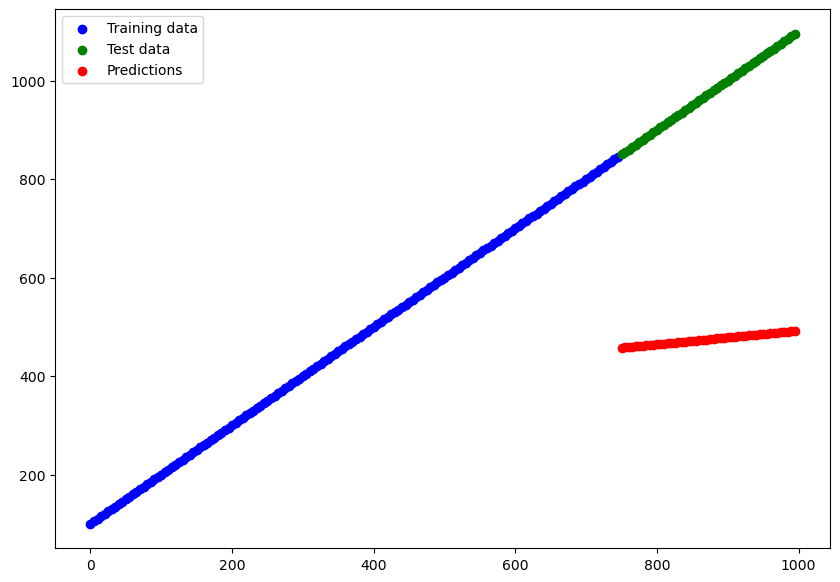

In [42]:
# Make predictions with out trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

# plot the models preds against regression data
plt.figure(figsize=(10,7))
plt.scatter(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data"),
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [43]:
# Set the random seed
tf.random.set_seed(42)

with tf.device("/CPU:0"):
    # 1. Create the model
    model_4 = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
    ])

    # 2. Compile our model
    model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                   metrics=["accuracy"])

    # fit the model
    hitstory = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 858us/step - loss: 4.3355 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 890us/step - loss: 4.2895 - accuracy: 0.4650
Epoch 3/100
32/32 [==============================] - 0s 883us/step - loss: 4.2527 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 847us/step - loss: 4.2206 - accuracy: 0.4650
Epoch 5/100
32/32 [==============================] - 0s 842us/step - loss: 4.2013 - accuracy: 0.4660
Epoch 6/100
32/32 [==============================] - 0s 861us/step - loss: 4.1466 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 832us/step - loss: 4.0523 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 862us/step - loss: 3.9430 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 845us/step - loss: 3.9350 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 860us/step - loss: 3.9197 - accura

32/32 [==============================] - 0s 777us/step - loss: 0.7698 - accuracy: 0.4890
Epoch 82/100
32/32 [==============================] - 0s 799us/step - loss: 0.7676 - accuracy: 0.4900
Epoch 83/100
32/32 [==============================] - 0s 847us/step - loss: 0.7656 - accuracy: 0.4900
Epoch 84/100
32/32 [==============================] - 0s 789us/step - loss: 0.7636 - accuracy: 0.4910
Epoch 85/100
32/32 [==============================] - 0s 811us/step - loss: 0.7616 - accuracy: 0.4910
Epoch 86/100
32/32 [==============================] - 0s 790us/step - loss: 0.7597 - accuracy: 0.4920
Epoch 87/100
32/32 [==============================] - 0s 795us/step - loss: 0.7578 - accuracy: 0.4920
Epoch 88/100
32/32 [==============================] - 0s 769us/step - loss: 0.7560 - accuracy: 0.4920
Epoch 89/100
32/32 [==============================] - 0s 794us/step - loss: 0.7542 - accuracy: 0.4930
Epoch 90/100
32/32 [==============================] - 0s 776us/step - loss: 0.7524 - accuracy: 

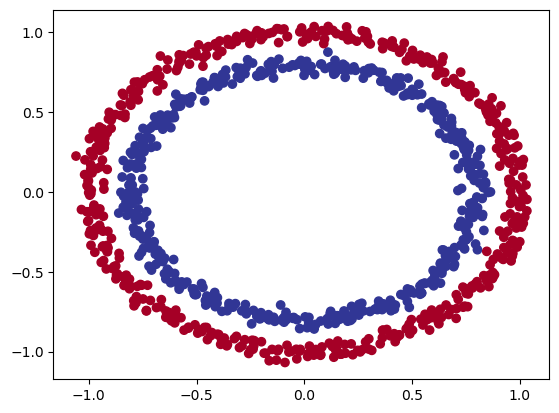

In [44]:
# Check our data
plt.scatter(X[:, 0], X[: , 1], c=y, cmap=plt.cm.RdYlBu)

65/79 [=======================>......] - ETA: 0s

2023-01-02 19:16:37.073665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 0s 3ms/step
Doing binary classification


2023-01-02 19:16:37.283172: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:37.283218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-02 19:16:37.306580: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:37.306628: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: 

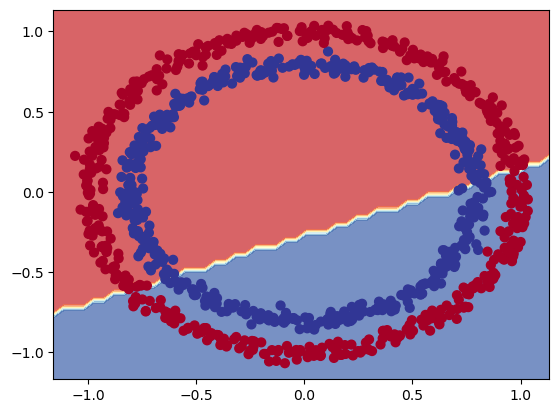

In [45]:
# check decision boundary for this model
plot_decision_boundary(model=model_4,
                      X=X,
                      y=y)

Lets use a non-linear activation function... any activation function that is not 'linear'

In [46]:
# set random seed
tf.random.set_seed(42)


with tf.device("/CPU:0"):
    # 1. Create a model with a non-linear model
    model_5 = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
    ])

    # 2. compile model
    model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                   metrics=["accuracy"])

    # 3. fit the model
    model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 882us/step - loss: 5.9714 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 865us/step - loss: 5.9582 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 878us/step - loss: 5.9348 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 828us/step - loss: 5.9300 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 831us/step - loss: 5.9173 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 825us/step - loss: 5.8954 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 808us/step - loss: 5.8685 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 846us/step - loss: 5.8548 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 848us/step - loss: 5.7803 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 811us/step - loss: 5.7726 - accura

32/32 [==============================] - 0s 769us/step - loss: 4.3940 - accuracy: 0.4780
Epoch 82/100
32/32 [==============================] - 0s 778us/step - loss: 4.3925 - accuracy: 0.4770
Epoch 83/100
32/32 [==============================] - 0s 791us/step - loss: 4.3911 - accuracy: 0.4770
Epoch 84/100
32/32 [==============================] - 0s 802us/step - loss: 4.3896 - accuracy: 0.4770
Epoch 85/100
32/32 [==============================] - 0s 770us/step - loss: 4.3882 - accuracy: 0.4760
Epoch 86/100
32/32 [==============================] - 0s 777us/step - loss: 4.3868 - accuracy: 0.4760
Epoch 87/100
32/32 [==============================] - 0s 804us/step - loss: 4.3855 - accuracy: 0.4760
Epoch 88/100
32/32 [==============================] - 0s 779us/step - loss: 4.3841 - accuracy: 0.4760
Epoch 89/100
32/32 [==============================] - 0s 787us/step - loss: 4.3828 - accuracy: 0.4760
Epoch 90/100
32/32 [==============================] - 0s 763us/step - loss: 4.3816 - accuracy: 

In [47]:
# Replicate multi-layer 2 layer, 4 neuron relu

with tf.device("/CPU:0"):
    # set seed
    tf.random.set_seed(42)

    # 1. Create model
    model_6 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1)
    ])

    # 2. compile the model
    model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                   metrics=["accuracy"])

    # 3. Fit the model
    model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1450 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.5024 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.9338 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 906us/step - loss: 3.6470 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 902us/step - loss: 1.7351 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 911us/step - loss: 1.2635 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 909us/step - loss: 1.2090 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 911us/step - loss: 1.1666 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 898us/step - loss: 1.1318 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 900us/step - loss: 1.1007 - accuracy: 0.

32/32 [==============================] - 0s 856us/step - loss: 0.6976 - accuracy: 0.4910
Epoch 82/100
32/32 [==============================] - 0s 845us/step - loss: 0.6972 - accuracy: 0.4910
Epoch 83/100
32/32 [==============================] - 0s 901us/step - loss: 0.6968 - accuracy: 0.4930
Epoch 84/100
32/32 [==============================] - 0s 854us/step - loss: 0.6963 - accuracy: 0.4920
Epoch 85/100
32/32 [==============================] - 0s 857us/step - loss: 0.6960 - accuracy: 0.4930
Epoch 86/100
32/32 [==============================] - 0s 873us/step - loss: 0.6957 - accuracy: 0.4930
Epoch 87/100
32/32 [==============================] - 0s 847us/step - loss: 0.6952 - accuracy: 0.4910
Epoch 88/100
32/32 [==============================] - 0s 881us/step - loss: 0.6948 - accuracy: 0.4890
Epoch 89/100
32/32 [==============================] - 0s 852us/step - loss: 0.6945 - accuracy: 0.4860
Epoch 90/100
32/32 [==============================] - 0s 884us/step - loss: 0.6942 - accuracy: 

In [48]:
# 4. Evaluate model
model_6.evaluate(X, y)

13/32 [===========>..................] - ETA: 0s - loss: 0.6925 - accuracy: 0.4832

2023-01-02 19:16:43.942347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:16:43.966030: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:43.966136: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


32/32 [==============================] - 0s 10ms/step - loss: 0.6900 - accuracy: 0.5110


[0.689958930015564, 0.5110000371932983]

79/79 [==============================] - 0s 2ms/step


2023-01-02 19:16:44.399630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:16:44.547759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:44.547808: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-02 19:16:44.572333: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:44.572379: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

Doing binary classification


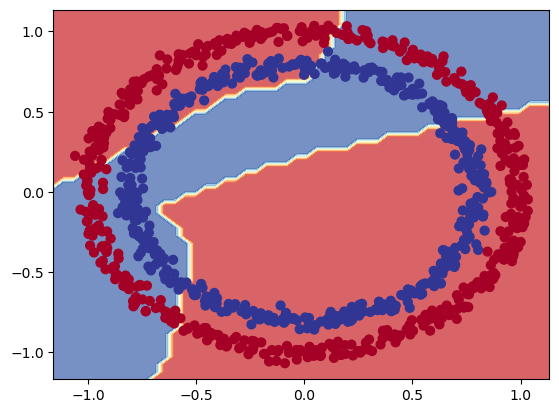

In [49]:
# check plot predictions
plot_decision_boundary(model_6, X, y)

In [50]:
# Change output layer activation function

# set seed
tf.random.set_seed(42)

with tf.device("/CPU:0"):
    # 1. Create the model
    model_7 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ])

    # 2. compile the model
    model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                   metrics=["accuracy"])

    # 3. Fit the model
    model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 984us/step - loss: 0.7006 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 949us/step - loss: 0.6987 - accuracy: 0.4970
Epoch 3/100
32/32 [==============================] - 0s 960us/step - loss: 0.6975 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 900us/step - loss: 0.6967 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 933us/step - loss: 0.6962 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 883us/step - loss: 0.6957 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 909us/step - loss: 0.6952 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 898us/step - loss: 0.6950 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 914us/step - loss: 0.6945 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 923us/step - loss: 0.6943 - accura

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 82/100
32/32 [==============================] - 0s 921us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 83/100
32/32 [==============================] - 0s 900us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 893us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 906us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 907us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 890us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 888us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 898us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 892us/step - loss: 0.6932 - accuracy: 0.

In [51]:
# Evaluate the model
model_7.evaluate(X, y)

 7/32 [=====>........................] - ETA: 0s - loss: 0.6930 - accuracy: 0.5312

2023-01-02 19:16:48.214260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:16:48.236277: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:48.236322: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


32/32 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000


[0.693149745464325, 0.5]

58/79 [=====================>........] - ETA: 0s

2023-01-02 19:16:48.673523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 0s 3ms/step
Doing binary classification


2023-01-02 19:16:48.895292: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:48.895338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-02 19:16:48.919183: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:48.919263: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: 

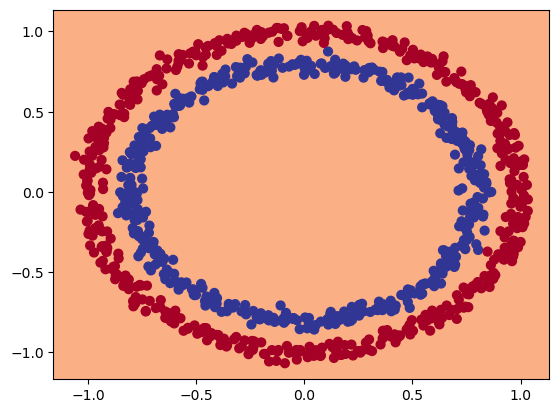

In [52]:
# plot the predictions
plot_decision_boundary(model_7, X, y)

In [53]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)

In [54]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

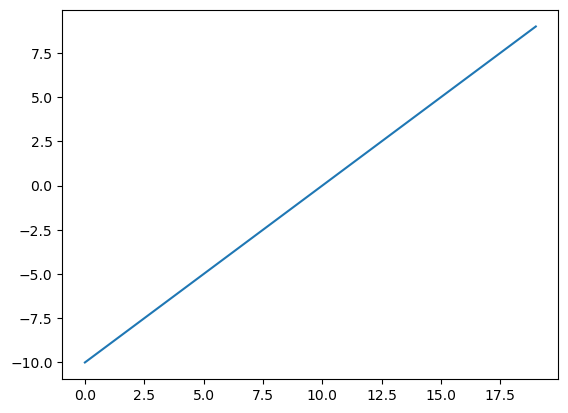

In [55]:
# visualize the tensor
plt.plot(A)

In [56]:
# Replicate sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# use sigmoid on toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397865e-05, 1.2339462e-04, 3.3535017e-04, 9.1105100e-04,
       2.4726237e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
       1.1920293e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330711e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

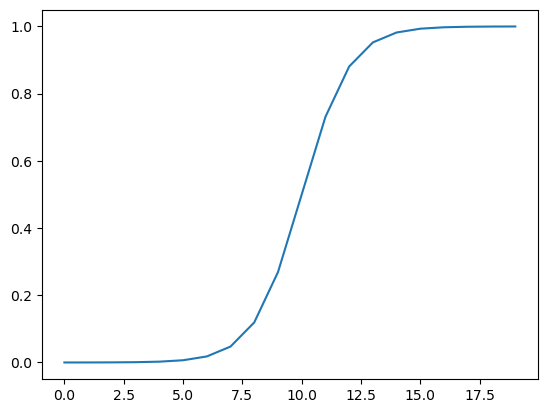

In [57]:
# plot toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [58]:
# recreate relu function
def relu(x):
    return tf.maximum(0, x)

# pass tensor into the new relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

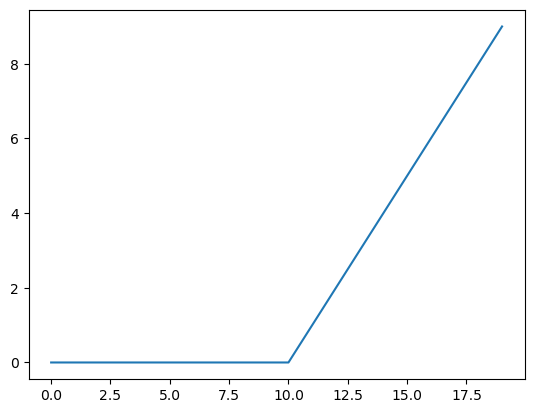

In [59]:
# plot it
plt.plot(relu(A))

In [60]:
# lets try the linear activation function
#I'm not doing this. It just passes the tensor through without modification

## Evaluate and improve our classification model


In [61]:
# Check how many examples we have
len(X)

1000

In [62]:
# import train test split to create training and test splits of the data
from sklearn.model_selection import train_test_split

In [63]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
# Let's recreate the model to train and test it on the new splits

# set seed
tf.random.set_seed(42)

with tf.device("/CPU:0"):
    # 1. Create the model
    final_model = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ])
    
    # 2. Compile the model
    final_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                       metrics=["accuracy"])
    
    # 3. fit the model
    history = final_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 953us/step - loss: 0.6854 - accuracy: 0.5325
Epoch 2/100
25/25 [==============================] - 0s 911us/step - loss: 0.6782 - accuracy: 0.5612
Epoch 3/100
25/25 [==============================] - 0s 893us/step - loss: 0.6699 - accuracy: 0.6438
Epoch 4/100
25/25 [==============================] - 0s 924us/step - loss: 0.6539 - accuracy: 0.6050
Epoch 5/100
25/25 [==============================] - 0s 844us/step - loss: 0.6321 - accuracy: 0.7188
Epoch 6/100
25/25 [==============================] - 0s 866us/step - loss: 0.5954 - accuracy: 0.7475
Epoch 7/100
25/25 [==============================] - 0s 823us/step - loss: 0.5339 - accuracy: 0.9087
Epoch 8/100
25/25 [==============================] - 0s 833us/step - loss: 0.4532 - accuracy: 0.9287
Epoch 9/100
25/25 [==============================] - 0s 822us/step - loss: 0.3713 - accuracy: 0.9712
Epoch 10/100
25/25 [==============================] - 0s 846us/step - loss: 0.3222 - accura

25/25 [==============================] - 0s 842us/step - loss: 0.0195 - accuracy: 0.9962
Epoch 82/100
25/25 [==============================] - 0s 811us/step - loss: 0.0163 - accuracy: 0.9937
Epoch 83/100
25/25 [==============================] - 0s 812us/step - loss: 0.0226 - accuracy: 0.9925
Epoch 84/100
25/25 [==============================] - 0s 832us/step - loss: 0.0227 - accuracy: 0.9925
Epoch 85/100
25/25 [==============================] - 0s 791us/step - loss: 0.0213 - accuracy: 0.9925
Epoch 86/100
25/25 [==============================] - 0s 839us/step - loss: 0.0144 - accuracy: 0.9950
Epoch 87/100
25/25 [==============================] - 0s 811us/step - loss: 0.0139 - accuracy: 0.9962
Epoch 88/100
25/25 [==============================] - 0s 843us/step - loss: 0.0230 - accuracy: 0.9937
Epoch 89/100
25/25 [==============================] - 0s 800us/step - loss: 0.0161 - accuracy: 0.9925
Epoch 90/100
25/25 [==============================] - 0s 848us/step - loss: 0.0122 - accuracy: 

In [65]:
# Evaluate the model
final_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 13ms/step - loss: 0.0189 - accuracy: 0.9900


2023-01-02 19:16:52.069280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:16:52.091738: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:52.091786: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


[0.01886947639286518, 0.9899999499320984]

 1/79 [..............................] - ETA: 2s

2023-01-02 19:16:52.248123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 0s 3ms/step
Doing binary classification


2023-01-02 19:16:52.464578: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:52.464628: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-02 19:16:52.488222: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:16:52.488269: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: 

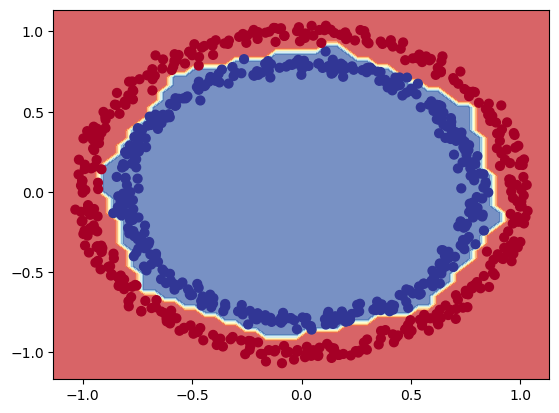

In [66]:
#  plot the decision boundary
plot_decision_boundary(final_model, X_train, y_train)

## Plot the loss curve

In [67]:
# Convert history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.685352,0.53250
1,0.678215,0.56125
2,0.669902,0.64375
3,0.653940,0.60500
4,0.632077,0.71875
...,...,...
95,0.013534,0.99625
96,0.012459,0.99625
97,0.013393,0.99625
98,0.013647,0.99625


Text(0.5, 1.0, 'Final Model Loss Curve')

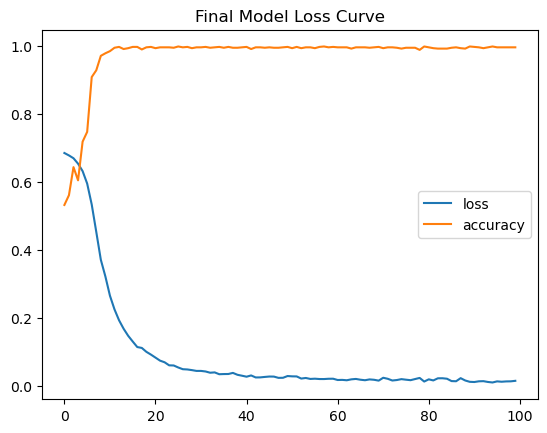

In [68]:
# plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Final Model Loss Curve")

**NOTE:** For many problems the loss function going down means the model is improving. Predictions are getting closer to the ground-truth labels.

## Find the best learning rate

To find the ideal learning rate, the learning rate where the loss decreases the most during training, we're going to use the following steps:

* A learning rate **callback** - a callback is a piece of functionality you can add to your model *while* it is training
* Another model
* A modified loss curves plot

In [69]:
# set seed
tf.random.set_seed(42)

with tf.device("/CPU:0"):
    # 1. Create the model
    model_9 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    # 2. Compile the model
    model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

    # Create a learning rate callback
    lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

    # 3. Fit the model
    history = model_9.fit(X_train, y_train, epochs=75, callbacks=[lr_scheduler])

Epoch 1/75
25/25 [==============================] - 0s 874us/step - loss: 0.7008 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/75
25/25 [==============================] - 0s 884us/step - loss: 0.7001 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/75
25/25 [==============================] - 0s 852us/step - loss: 0.6996 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/75
25/25 [==============================] - 0s 879us/step - loss: 0.6990 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/75
25/25 [==============================] - 0s 872us/step - loss: 0.6983 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/75
25/25 [==============================] - 0s 827us/step - loss: 0.6976 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/75
25/25 [==============================] - 0s 842us/step - loss: 0.6970 - accuracy: 0.5038 - lr: 1.9953e-04
Epoch 8/75
25/25 [==============================] - 0s 838us/step - loss: 0.6962 - accuracy: 0.5025 - lr: 2.2387e-04
Epoch 9/75
25/25 [==============================] - 0s 868us/ste

25/25 [==============================] - 0s 841us/step - loss: 0.1813 - accuracy: 0.9425 - lr: 0.3548
Epoch 73/75
25/25 [==============================] - 0s 807us/step - loss: 0.1794 - accuracy: 0.9300 - lr: 0.3981
Epoch 74/75
25/25 [==============================] - 0s 813us/step - loss: 0.1498 - accuracy: 0.9450 - lr: 0.4467
Epoch 75/75
25/25 [==============================] - 0s 805us/step - loss: 0.5018 - accuracy: 0.8037 - lr: 0.5012


<AxesSubplot: xlabel='epochs'>

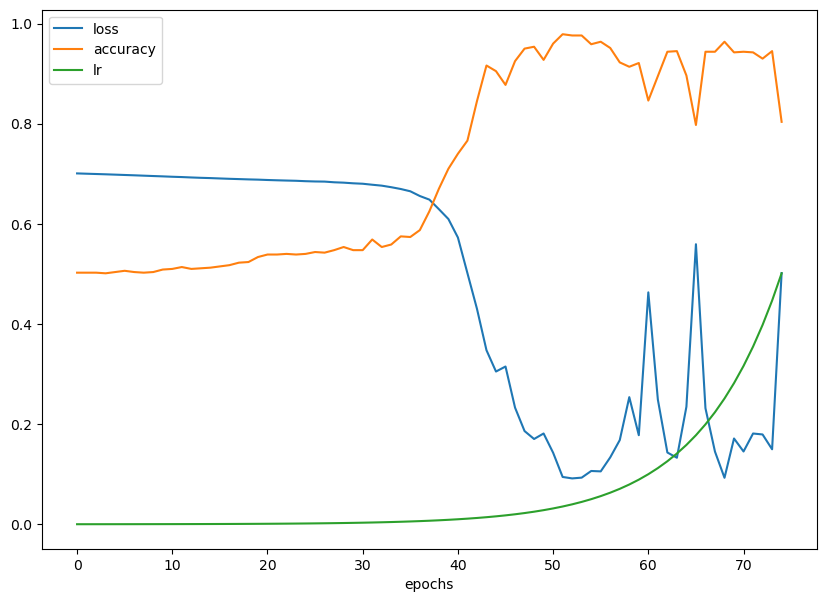

In [71]:
# Check out the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

In [76]:
# Plot learning rate vs loss
lrs = 1e-4 * 10 ** (tf.range(75)/20)

In [77]:
len(lrs)

75

In [78]:
lrs

<tf.Tensor: shape=(75,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.46683

Text(0.5, 1.0, 'Learning Rate vs Loss')

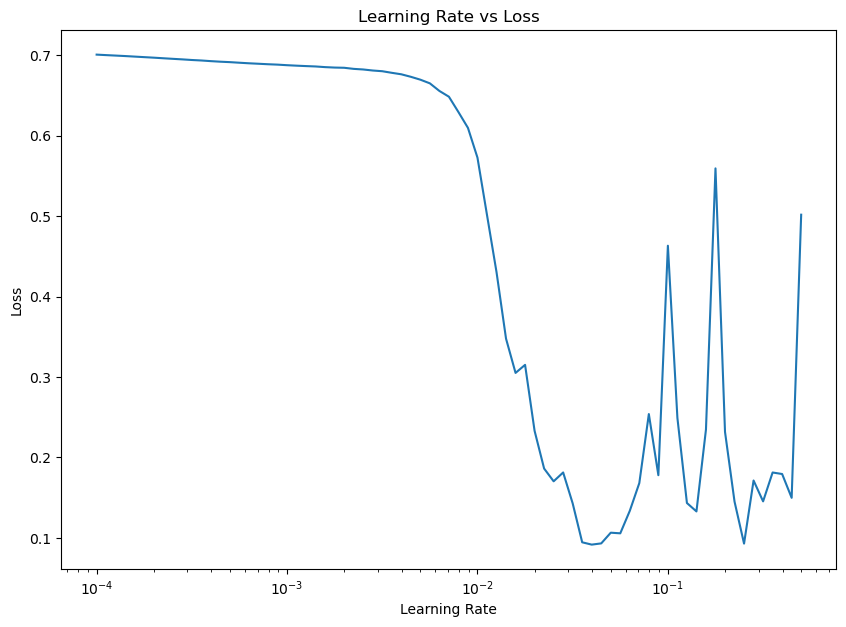

In [79]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [92]:
# Lets try using a higher "ideal" learning rate as observed in the graph above

# set seed
tf.random.set_seed(42)

with tf.device("/CPU:0"):
    # build the model
    model_10 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    # compile the model
    model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=.02),
                    metrics=["accuracy"])

    # fit the model
    history_10 = model_10.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 935us/step - loss: 0.6945 - accuracy: 0.5075
Epoch 2/100
25/25 [==============================] - 0s 897us/step - loss: 0.6905 - accuracy: 0.5213
Epoch 3/100
25/25 [==============================] - 0s 952us/step - loss: 0.6872 - accuracy: 0.5362
Epoch 4/100
25/25 [==============================] - 0s 902us/step - loss: 0.6764 - accuracy: 0.5788
Epoch 5/100
25/25 [==============================] - 0s 856us/step - loss: 0.6637 - accuracy: 0.5888
Epoch 6/100
25/25 [==============================] - 0s 860us/step - loss: 0.6490 - accuracy: 0.6363
Epoch 7/100
25/25 [==============================] - 0s 859us/step - loss: 0.6346 - accuracy: 0.6525
Epoch 8/100
25/25 [==============================] - 0s 837us/step - loss: 0.5880 - accuracy: 0.7038
Epoch 9/100
25/25 [==============================] - 0s 823us/step - loss: 0.5352 - accuracy: 0.7862
Epoch 10/100
25/25 [==============================] - 0s 894us/step - loss: 0.4904 - accura

25/25 [==============================] - 0s 832us/step - loss: 0.0158 - accuracy: 0.9962
Epoch 82/100
25/25 [==============================] - 0s 893us/step - loss: 0.0132 - accuracy: 0.9950
Epoch 83/100
25/25 [==============================] - 0s 831us/step - loss: 0.0183 - accuracy: 0.9937
Epoch 84/100
25/25 [==============================] - 0s 956us/step - loss: 0.0122 - accuracy: 0.9975
Epoch 85/100
25/25 [==============================] - 0s 877us/step - loss: 0.0093 - accuracy: 0.9987
Epoch 86/100
25/25 [==============================] - 0s 838us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 87/100
25/25 [==============================] - 0s 874us/step - loss: 0.0103 - accuracy: 0.9975
Epoch 88/100
25/25 [==============================] - 0s 831us/step - loss: 0.0116 - accuracy: 0.9962
Epoch 89/100
25/25 [==============================] - 0s 854us/step - loss: 0.0105 - accuracy: 0.9962
Epoch 90/100
25/25 [==============================] - 0s 829us/step - loss: 0.0117 - accuracy: 

In [93]:
# Evaluate on test set
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 12ms/step - loss: 0.0146 - accuracy: 1.0000


2023-01-02 19:33:33.728709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-02 19:33:33.750862: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:33:33.750916: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


[0.014640512876212597, 1.0]

79/79 [==============================] - 0s 2ms/step


2023-01-02 19:35:34.022641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Doing binary classification
41/79 [==============>...............] - ETA: 0s

2023-01-02 19:35:34.225268: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:35:34.225316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-01-02 19:35:34.249637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:35:34.249682: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 83006 MB memory) -> physical PluggableDevice (device: 0, name: 

79/79 [==============================] - 0s 3ms/step
Doing binary classification


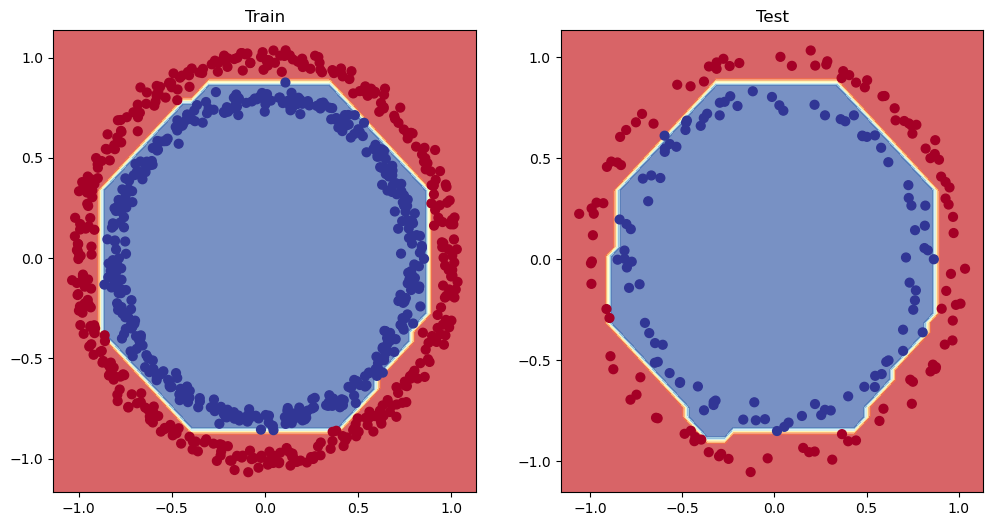

In [94]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

## More classification evaluation methods

Various other metrics:
* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix
* Classification Report (Sklearn)

In [96]:
# Check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 1.0000
Model loss on the test set: 0.014640512876212597
Model accuracy on the test set: 100.00%


Confusion Matrix

In [98]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# create confusion matrix
# confusion_matrix(y_test, y_preds) # <--- throws an error, binary vs continuous

7/7 [==============================] - 0s 3ms/step


Predictions have come out in **prediction probability** form. This is the standard output form from sigmoid and softmax.

In [99]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [101]:
# create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[105,   0],
       [  0,  95]])

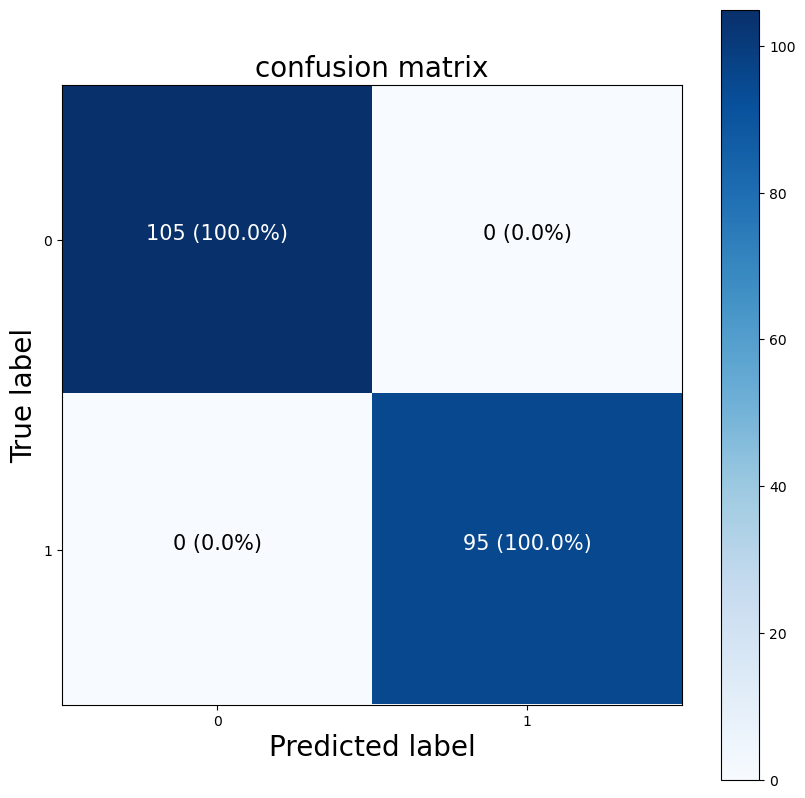

In [109]:
import itertools

figsize= (10, 10)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm=cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

n_classes = cm.shape[0]

# Let's make it look better
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
    labels = classes
else:
    labels=np.arange(cm.shape[0])
    
# Label the axes
ax.set(title="confusion matrix",
      xlabel="Predicted label",
      ylabel="True label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# set x axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# set label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on cells
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

# Working with larger example - MultiClass Classification

When you have more than two classes as an option, this is multiclass classification.

* 3 different classes = multiclass classification
* 100 different classes = still multiclass classification

We will build a neural network to identify different items of clothing. Fashion MNIST.

Kaggle - [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

TensorFlow - [Fashion MNIST](https://www.tensorflow.org/tutorials/keras/classification)

In [113]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is already sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [115]:
# Show the first training example
print(f"Training Sample:\n {train_data[0]}\n")
print(f"Training Label:\n {train_labels[0]}\n")

Training Sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [116]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

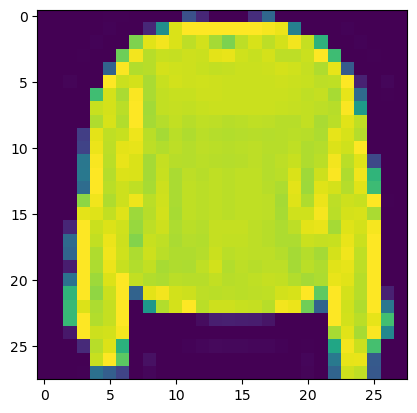

In [119]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [120]:
train_labels[7]

2

In [121]:
# Create list to have human readable label
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

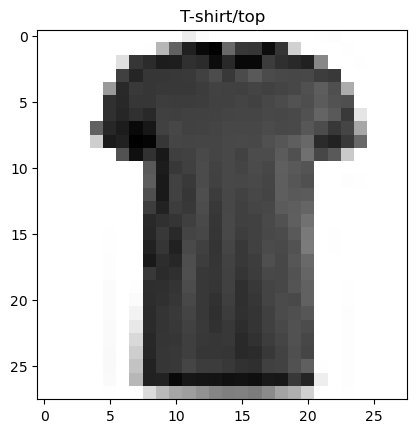

In [122]:
# plot an example image and it's label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

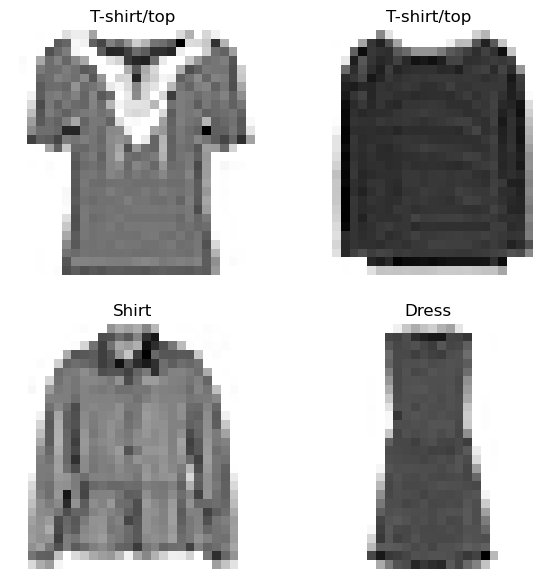

In [126]:
# Plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

We will need to use similar architecture with some changes:
* Input shape = 28 x 28 (shape of an image)
* Output shape = 1 per class (10 classes)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded, use CategoricalCrossentropy()
    * If your labels are integers, use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [133]:
# set seed
tf.random.set_seed(42)

with tf.device("/CPU:0"):
    # create model
    model_11 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)), # flatten data to turn it into a single vector
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    # compile the model
    model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # <--- Cross... is for one-hot encoded, Sparse... is for integers
                    optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                    metrics=["accuracy"])

    # fit the model
    non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7221 - accuracy: 0.2662 - val_loss: 1.6500 - val_accuracy: 0.2864
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6244 - accuracy: 0.2888 - val_loss: 1.5790 - val_accuracy: 0.3191
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6127 - accuracy: 0.3017 - val_loss: 1.6129 - val_accuracy: 0.2819
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6033 - accuracy: 0.3077 - val_loss: 1.6050 - val_accuracy: 0.3094
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6062 - accuracy: 0.3054 - val_loss: 1.7225 - val_accuracy: 0.2734
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6047 - accuracy: 0.3079 - val_loss: 1.6317 - val_accuracy: 0.3114
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6007 - accuracy: 0.3090 - val_loss: 1.5735 - val_accuracy:

In [134]:
# check model summary
model_11.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_72 (Dense)            (None, 4)                 3140      
                                                                 
 dense_73 (Dense)            (None, 4)                 20        
                                                                 
 dense_74 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [135]:
# Check min and max of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (normalized), find patterns between 0 and 1.

In [136]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [138]:
# set seed
tf.random.set_seed

with tf.device("/CPU:0"):
    # create model
    model_12 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
    # compile the model
    model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])
    
    # fit the model
    norm_history = model_12.fit(train_data_norm,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5244 - accuracy: 0.4310 - val_loss: 1.1853 - val_accuracy: 0.5464
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0524 - accuracy: 0.6069 - val_loss: 1.0003 - val_accuracy: 0.6261
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9373 - accuracy: 0.6411 - val_loss: 0.9203 - val_accuracy: 0.6514
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8793 - accuracy: 0.6685 - val_loss: 0.8858 - val_accuracy: 0.6780
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8348 - accuracy: 0.6898 - val_loss: 0.8428 - val_accuracy: 0.7023
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8020 - accuracy: 0.7107 - val_loss: 0.8509 - val_accuracy: 0.7084
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7796 - accuracy: 0.7254 - val_loss: 0.8220 - val_accuracy:

**NOTE:** The only change between model_11 and model_12 was normalizing the data. This shot the accuracy up from 35% to over 70%.

<AxesSubplot: title={'center': 'Normalized Data'}>

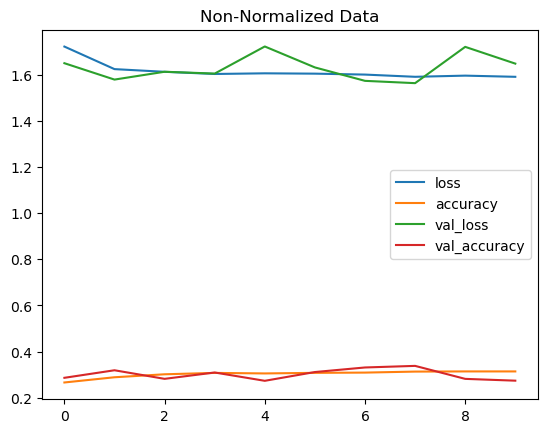

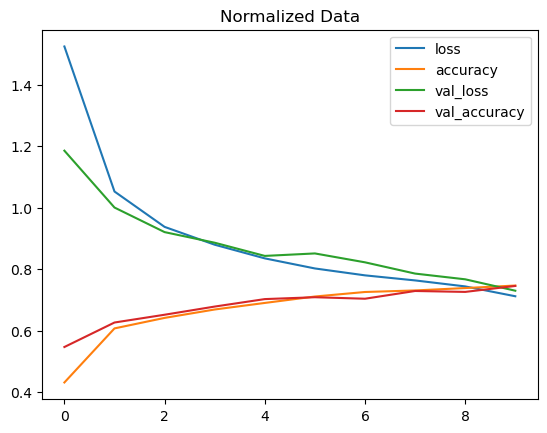

In [139]:
import pandas as pd
# plot non-normalized loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")

# plot normalized loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

**NOTE:** The same model with even *slightly* different data can produce *dramatically* different results. When comparing models, it's important to ensure you're comparing them on the same criteria.
* Same architecture with different data
* Same data, different architecture
* Always change one thing at a time to isolate the impact of a performance variable

## Finding the ideal learning rate

In [140]:
# set seed
tf.random.set_seed(42)

with tf.device("/CPU:0"):
    # create model
    model_13 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
    # compile the model
    model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])
    
    # create learning rate callback
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))
    
    # fit the model
    find_lr_history = model_13.fit(train_data_norm,
                                   train_labels,
                                   epochs=40,
                                   validation_data=(test_data_norm, test_labels),
                                   callbacks=lr_scheduler)

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5379 - accuracy: 0.3829 - val_loss: 1.2148 - val_accuracy: 0.4837 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1255 - accuracy: 0.5300 - val_loss: 1.0783 - val_accuracy: 0.5700 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0257 - accuracy: 0.5906 - val_loss: 0.9895 - val_accuracy: 0.6317 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9008 - accuracy: 0.6783 - val_loss: 0.8615 - val_accuracy: 0.7115 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7859 - accuracy: 0.7352 - val_loss: 0.7615 - val_accuracy: 0.7447 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6997 - accuracy: 0.7666 - val_loss: 0.6953 - val_accuracy: 0.7684 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'Finding Learning Rate')

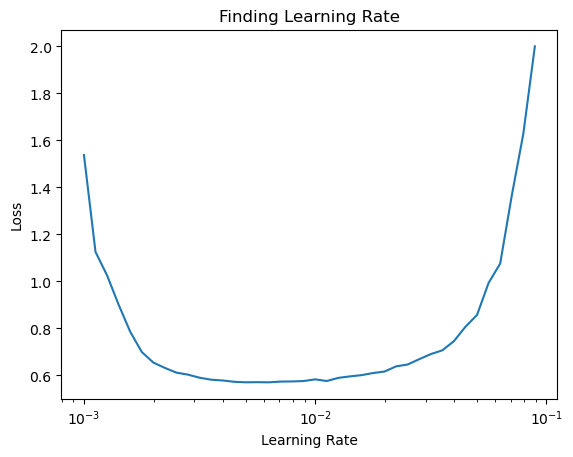

In [141]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10 ** (tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Learning Rate")

In [143]:
# Refit model with the ideal learning rate

# set seed
tf.random.set_seed(42)

with tf.device("/CPU:0"):
    # create model
    model_14 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
    # compile the model
    model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])
    
    # fit the model
    history_14 = model_14.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2442 - accuracy: 0.5340 - val_loss: 0.8156 - val_accuracy: 0.7057
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7081 - accuracy: 0.7492 - val_loss: 0.7233 - val_accuracy: 0.7453
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6196 - accuracy: 0.7836 - val_loss: 0.6311 - val_accuracy: 0.7772
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5819 - accuracy: 0.7976 - val_loss: 0.6044 - val_accuracy: 0.7922
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5632 - accuracy: 0.8041 - val_loss: 0.5882 - val_accuracy: 0.7985
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5484 - accuracy: 0.8092 - val_loss: 0.5698 - val_accuracy: 0.8054
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5379 - accuracy: 0.8135 - val_loss: 0.5706 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification, we could:
* Evaluate its performance using classification metrics like with a Confusion Matrix
* Asses some of it's predictions through visualizations
* Improve it's results with tuning
* Save and export it for use in an application

Exploring top 2...

In [144]:
import itertools
from sklearn.metrics import confusion_matrix

# create confusion matrix function
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm=cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    n_classes = cm.shape[0]

    # Let's make it look better
    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # set labels to be classes
    if classes:
        labels = classes
    else:
        labels=np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="confusion matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    # set x axis labels to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # set label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # set threshold for colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on cells
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)


In [145]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [147]:
# make predictions with model
y_probs = model_14.predict(test_data_norm) # probs is for prediction probabilities

# view the first 5 predictions
y_probs[:5]

 46/313 [===>..........................] - ETA: 0s

2023-01-03 11:47:09.150721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


array([[1.98082120e-10, 4.50805761e-13, 1.17122720e-08, 5.54922297e-12,
        4.76682409e-12, 1.51880354e-01, 5.20164078e-10, 1.36288658e-01,
        7.08208900e-05, 7.11760163e-01],
       [6.42037194e-04, 1.41065812e-10, 9.26641166e-01, 1.82313015e-05,
        5.75463334e-03, 1.16575876e-32, 6.64661750e-02, 0.00000000e+00,
        4.77755268e-04, 0.00000000e+00],
       [4.07258760e-09, 9.99827862e-01, 7.03860906e-06, 1.44915539e-04,
        2.01330295e-05, 2.86394888e-12, 5.51423796e-09, 1.57777144e-32,
        5.81109119e-11, 1.08260907e-19],
       [1.11485515e-10, 9.99946475e-01, 2.34053829e-07, 5.30686957e-05,
        2.79591319e-07, 2.42910686e-14, 2.62889519e-11, 4.95418817e-36,
        1.17476965e-13, 5.01777479e-19],
       [1.64863765e-01, 3.76841926e-05, 1.43839657e-01, 2.19644494e-02,
        5.39720953e-02, 1.15548272e-12, 6.05155587e-01, 8.30795327e-20,
        1.01668099e-02, 3.46277365e-28]], dtype=float32)

> Remember to always make predictions on the same kind of data it was trained on. For example, if data was normalized, make predictions on normalized data.

In [148]:
# convert pred probs into integers
y_preds = y_probs.argmax(axis=1)

# view first 10
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [150]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                y_pred=y_preds)

array([[779,   1,   8,  94,   4,   7,  90,   0,  17,   0],
       [  1, 950,   7,  33,   4,   1,   2,   0,   2,   0],
       [ 23,   4, 702,  15, 143,   1,  98,   0,  14,   0],
       [ 62,  12,  21, 825,  31,   5,  41,   0,   3,   0],
       [  0,   5, 105,  35, 732,   0, 116,   0,   7,   0],
       [  0,   0,   0,   0,   0, 908,   1,  53,   6,  32],
       [179,   2, 112,  52, 103,   2, 516,   0,  34,   0],
       [  0,   0,   0,   0,   0,  35,   0, 943,   1,  21],
       [ 12,   0,   6,   6,   1,  16,  25,   5, 929,   0],
       [  0,   0,   0,   0,   0,  26,   0,  67,   1, 906]])

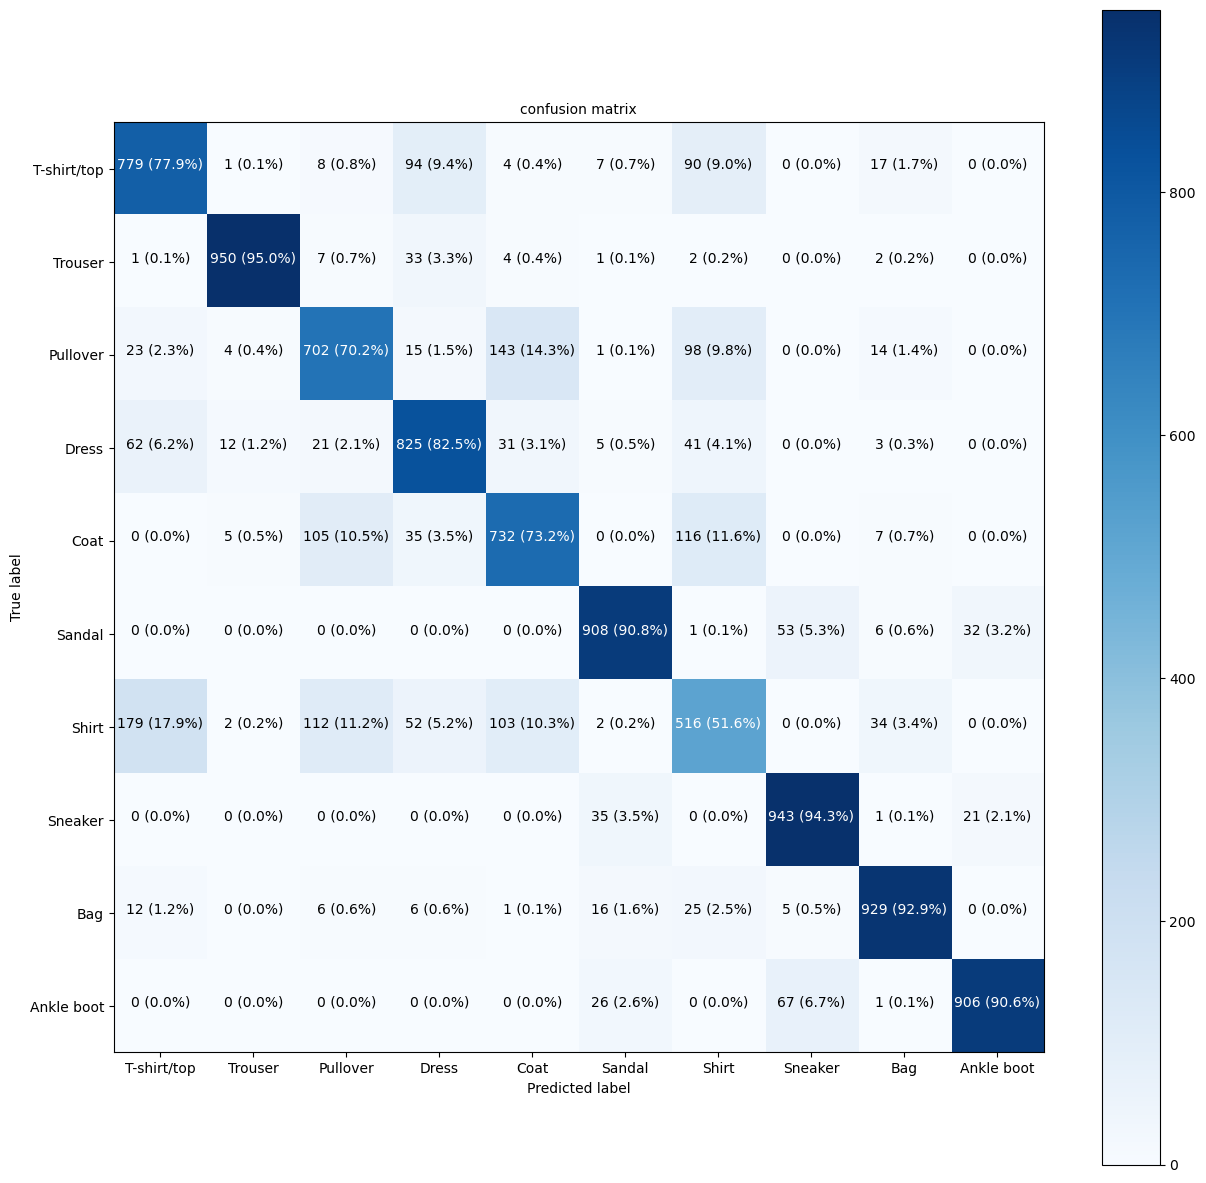

In [153]:
# Make a more visualize confusion matrix
make_confusion_matrix(y_true=test_labels,
                     y_pred=y_preds,
                     classes=class_names,
                     figsize=(15,15),
                     text_size=10)

> **NOTE:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the input and output of your models

Create a function:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [155]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """
    # set up random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # change the title color depending on the prediction being right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # add xlabel info
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 
                                                     100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color)

1/1 [==============================] - 0s 18ms/step


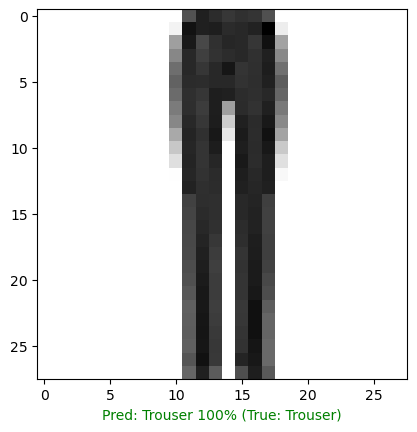

In [161]:
# check out a random image and prediction
plot_random_image(model=model_14,
                 images=test_data_norm, # make predictions on the same kind of data the model was trained on
                 true_labels=test_labels,
                 classes=class_names)

## What patterns are our models learning?

In [162]:
# Find the layers of our most recent model
model_14.layers

In [163]:
# Extract a particular layer, hidden layer 1
model_14.layers[1]

In [164]:
# Get the patterns of a particular layer
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[ 1.8327496 , -0.3765321 , -1.0123563 , -1.4733841 ],
        [-0.13410541,  0.9314082 , -1.0257983 , -0.32584912],
        [ 1.9507891 ,  1.0346321 , -2.1054595 , -1.7286264 ],
        ...,
        [-0.6407212 ,  1.1652205 ,  0.19685835, -0.20350681],
        [-0.28289634,  0.33117256,  1.1687715 , -1.6645502 ],
        [-0.01669064, -0.03217248, -0.48993725, -0.03885611]],
       dtype=float32),
 (784, 4))

In [165]:
28 * 28

784

In [166]:
model_14.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_84 (Dense)            (None, 4)                 3140      
                                                                 
 dense_85 (Dense)            (None, 4)                 20        
                                                                 
 dense_86 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Check out the bias vector...

In [167]:
# bias and biases shapes
biases, biases.shape

(array([0.51096314, 0.44669965, 0.22486421, 1.0527728 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [168]:
model_14.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_84 (Dense)            (None, 4)                 3140      
                                                                 
 dense_85 (Dense)            (None, 4)                 20        
                                                                 
 dense_86 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
